In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
np.random.seed(45)
num_samples = 40

# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

# Use $torch.autograd$

In [118]:
x1_torch = torch.from_numpy(x1).float()
y_torch = torch.from_numpy(y).float()
theta0 = torch.tensor(0.0, requires_grad=True)
theta1 = torch.tensor(0.0, requires_grad=True)
lin_reg = theta0 + theta1 * x1_torch
loss = torch.mean((lin_reg - y_torch)**2)
loss.backward()
print(f'Loss: {loss.item()}')
print(f'Theta0: {theta0.grad.item()}')
print(f'Theta1: {theta1.grad.item()}')

Loss: 16.681486129760742
Theta0: -7.447054386138916
Theta1: -1.0253016948699951


# Stochastic Gradient

In [32]:
theta0 = torch.tensor(0.0, requires_grad=True)
theta1 = torch.tensor(0.0, requires_grad=True)
stochastic_gradients_theta0 = []
stochastic_gradients_theta1 = []
for i in range(len(x1_torch)):
    pred = theta1*x1_torch[i] + theta0
    loss_single = (pred-y_torch[i])**2
    loss_single.backward()
    stochastic_gradients_theta0.append(theta0.grad.item())
    stochastic_gradients_theta1.append(theta1.grad.item())
    theta0.grad.zero_()
    theta1.grad.zero_()
stochastic_gradients_theta0 = torch.tensor(stochastic_gradients_theta0).mean()
stochastic_gradients_theta1 = torch.tensor(stochastic_gradients_theta1).mean()


print(f'Loss: {loss_single.item()}')
print(f"Average Stochastic Gradient for θ0: {stochastic_gradients_theta0.item()}")
print(f"Average Stochastic Gradient for θ1: {stochastic_gradients_theta1.item()}\n")

Loss: 5.352800369262695
Average Stochastic Gradient for θ0: -7.4470534324646
Average Stochastic Gradient for θ1: -1.0253016948699951



# Gradient Descent Implementation


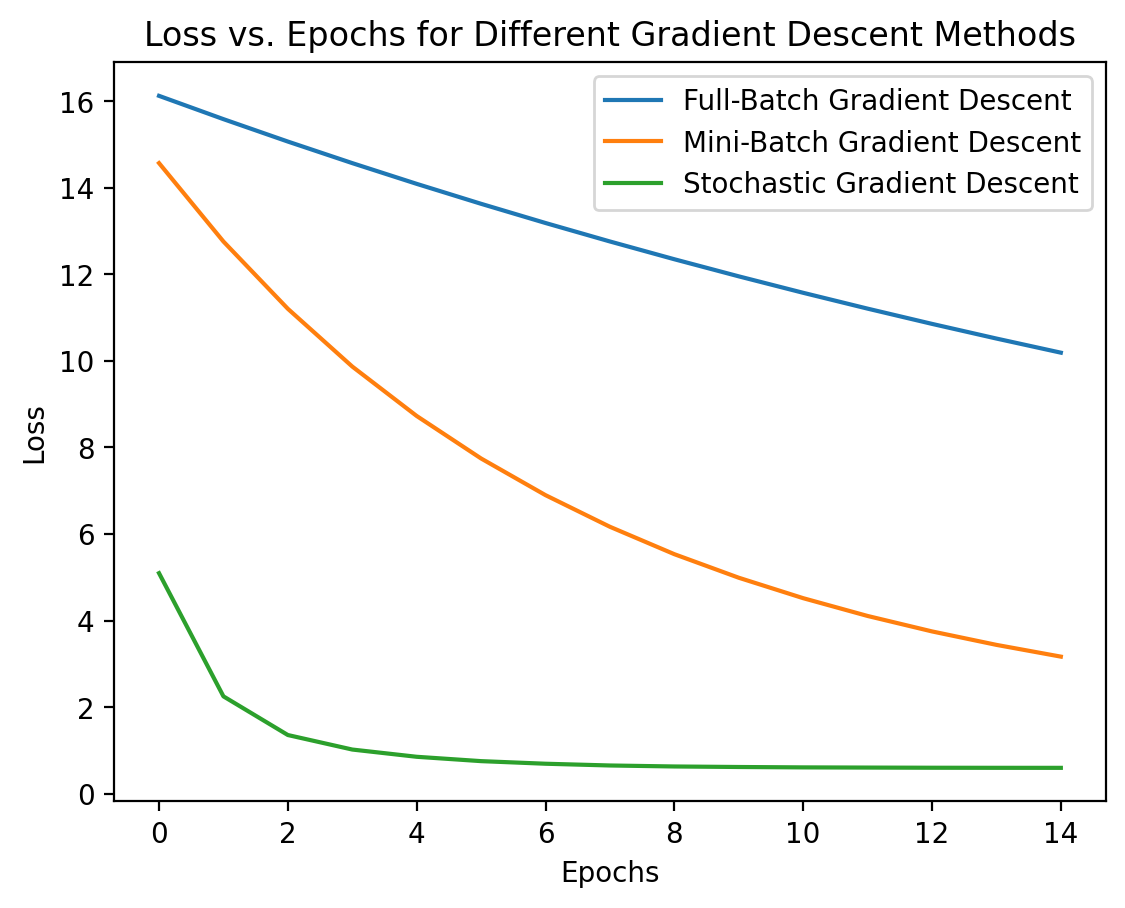

In [7]:
learning_rate = 0.01
epsilon = 0.001
epochs = 15
batch_size = 10  # For mini-batch gradient descent

# Loss function (Mean Squared Error)
def compute_loss(theta0, theta1, x, y):
    predictions = theta0 + theta1 * x
    return torch.mean((predictions - y) ** 2)

# Gradient descent step
def gradient_step(theta0, theta1, grad_theta0, grad_theta1, lr):
    theta0.data -= lr * grad_theta0
    theta1.data -= lr * grad_theta1
    return theta0, theta1

# Training loop for gradient descent
def train(x, y, method, batch_size=None):
    # Initialize parameters
    theta0 = torch.tensor(0.0, requires_grad=True)
    theta1 = torch.tensor(0.0, requires_grad=True)
    losses = []

    for epoch in range(epochs):
        if method == 'full-batch':
            # Full-batch GD: use the whole dataset
            predictions = theta0 + theta1 * x
            loss = torch.mean((predictions - y) ** 2)
            loss.backward()
            theta0, theta1 = gradient_step(theta0, theta1, theta0.grad, theta1.grad, learning_rate)
            theta0.grad.zero_()
            theta1.grad.zero_()

        elif method == 'mini-batch':
            # Mini-batch GD: loop over batches
            permutation = torch.randperm(len(x))
            for i in range(0, len(x), batch_size):
                indices = permutation[i:i+batch_size]
                x_batch, y_batch = x[indices], y[indices]
                predictions = theta0 + theta1 * x_batch
                loss = torch.mean((predictions - y_batch) ** 2)
                loss.backward()
                theta0, theta1 = gradient_step(theta0, theta1, theta0.grad, theta1.grad, learning_rate)
                theta0.grad.zero_()
                theta1.grad.zero_()

        elif method == 'stochastic':
            # Stochastic GD: loop over individual points
            permutation = torch.randperm(len(x))
            for i in permutation:
                predictions = theta0 + theta1 * x[i]
                loss = (predictions - y[i]) ** 2
                loss.backward()
                theta0, theta1 = gradient_step(theta0, theta1, theta0.grad, theta1.grad, learning_rate)
                theta0.grad.zero_()
                theta1.grad.zero_()

        # Calculate loss and store for plotting
        loss = compute_loss(theta0, theta1, x, y)
        losses.append(loss.item())

        # Check for convergence within the epsilon neighborhood
        if loss.item() < epsilon:
            break

    return losses, theta0, theta1

# Plotting function for loss vs. epochs
def plot_loss(losses_full, losses_mini, losses_sgd):
    plt.plot(losses_full, label='Full-Batch Gradient Descent')
    plt.plot(losses_mini, label='Mini-Batch Gradient Descent')
    plt.plot(losses_sgd, label='Stochastic Gradient Descent')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss vs. Epochs for Different Gradient Descent Methods')
    plt.show()

# Training each method
losses_full, theta0_full, theta1_full = train(x1_torch, y_torch, 'full-batch')
losses_mini, theta0_mini, theta1_mini = train(x1_torch, y_torch, 'mini-batch', batch_size)
losses_sgd, theta0_sgd, theta1_sgd = train(x1_torch, y_torch, 'stochastic')

# Plotting the results
plot_loss(losses_full, losses_mini, losses_sgd)

In [116]:
alpha = 0.06
epsilon = 0.001
epochs = 250
batch_size = 10
torch.manual_seed(40)
def gd_step(theta0, theta1, grad_theta0, grad_theta1, alpha):
    theta0.data -= alpha * grad_theta0
    theta1.data -= alpha * grad_theta1
    return theta0, theta1
def loss(theta0, theta1, x, y):
    pred = theta0 + theta1 * x
    return torch.mean((pred - y) ** 2)

def descent_algorithm(x1_torch, y_torch, method, alpha, epsilon, epochs, batch_size=None):
    theta0 = torch.tensor(0.0, requires_grad=True)
    theta1 = torch.tensor(0.0, requires_grad=True)
    iter = 0
    prev_loss = float('inf')
    for _ in (range(epochs)):
        losses = []

        if method=='full-batch':
            for i in range(len(x1_torch)):
                loss_gd = loss(theta0, theta1, x1_torch[i], y_torch[i])
                loss_gd.backward()
                #losses.append(loss_sgd.item())
                theta0, theta1 = gd_step(theta0, theta1, theta0.grad, theta1.grad, alpha)
                theta0.grad.zero_()
                theta1.grad.zero_()
                iter += 1

        elif method == 'mini-batch':
            shuffle = torch.randperm(len(x1_torch))
            for i in range(0, len(x1_torch), batch_size):
                batch = shuffle[i:i+batch_size]
                x_batch = x1_torch[batch]
                y_batch = y_torch[batch]
                loss_mbgd = loss(theta0, theta1, x_batch, y_batch)
                loss_mbgd.backward()
                #losses.append(loss_mbgd.item())
                theta0, theta1 = gd_step(theta0, theta1, theta0.grad, theta1.grad, alpha)
                theta0.grad.zero_()
                theta1.grad.zero_()
                iter += 1

        elif method == 'stochastic':
            shuffle = torch.randperm(len(x1_torch))
            for i in shuffle:
                loss_sgd = loss(theta0, theta1, x1_torch[i], y_torch[i])
                loss_sgd.backward()
                #losses.append(loss_sgd.item())
                theta0, theta1 = gd_step(theta0, theta1, theta0.grad, theta1.grad, alpha)
                theta0.grad.zero_()
                theta1.grad.zero_()
                iter += 1

        loss_final = loss(theta0, theta1, x1_torch, y_torch)
        losses.append(loss_final.item())
        # print(losses)
        if abs(prev_loss - loss_final) < epsilon:
            break
        prev_loss = loss_final

    return losses, theta0, theta1, iter, epochs

losses_full, theta0_full, theta1_full, iter_full, epoch_full = descent_algorithm(x1_torch, y_torch, 'full-batch', alpha, epsilon, epochs)
losses_mini, theta0_mini, theta1_mini, iter_mini, epoch_mini = descent_algorithm(x1_torch, y_torch, 'mini-batch', alpha, epsilon, epochs, batch_size)
losses_sgd, theta0_sgd, theta1_sgd, iter_sgd, epoch_sgd = descent_algorithm(x1_torch, y_torch, 'stochastic', alpha, epsilon, epochs)
print(losses_full, theta0_full.item(), theta1_full.item(), iter_full, epoch_full)
print(losses_mini, theta0_mini.item(), theta1_mini.item(), iter_mini, epoch_mini)
print(losses_sgd, theta0_sgd.item(), theta1_sgd.item(), iter_sgd, epoch_sgd)


[0.6555862426757812] 4.197541236877441 2.718449831008911 200 250
[0.5979453921318054] 3.9364099502563477 2.5992305278778076 96 250
[0.598047137260437] 3.9923555850982666 2.6501340866088867 240 250


# Gradient Descent with Momentum

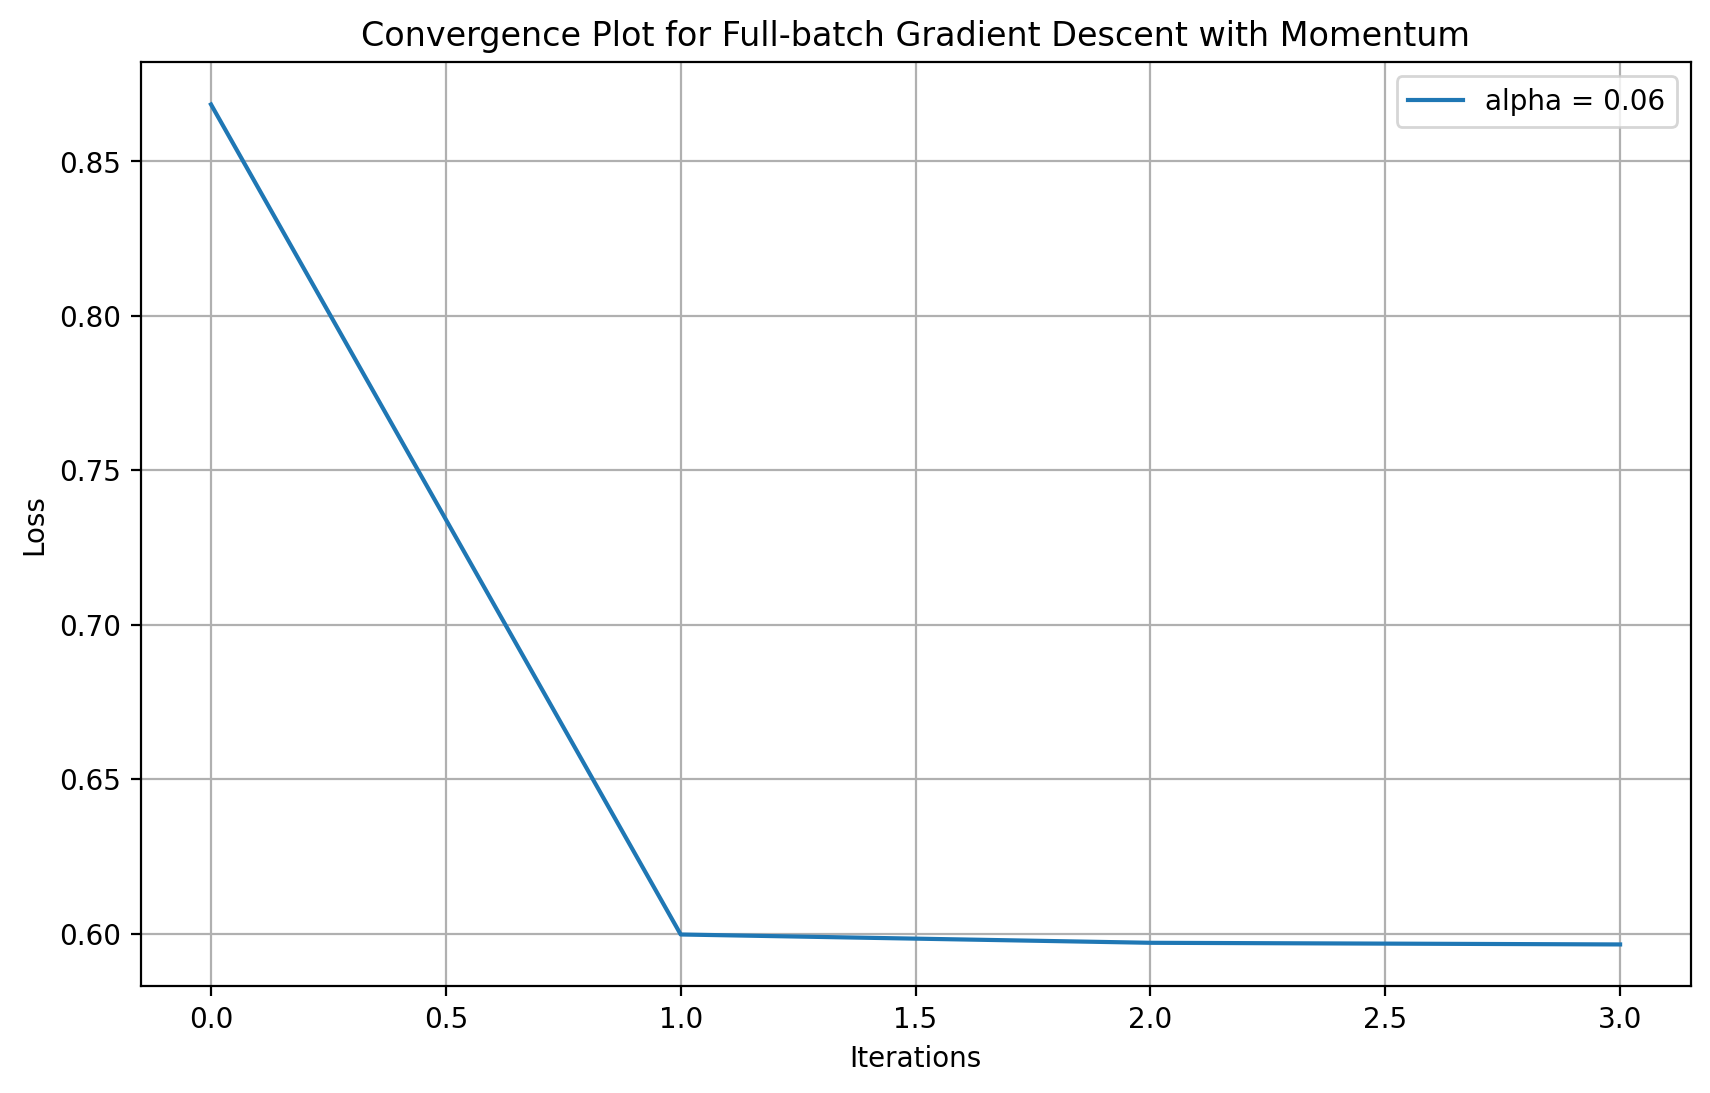

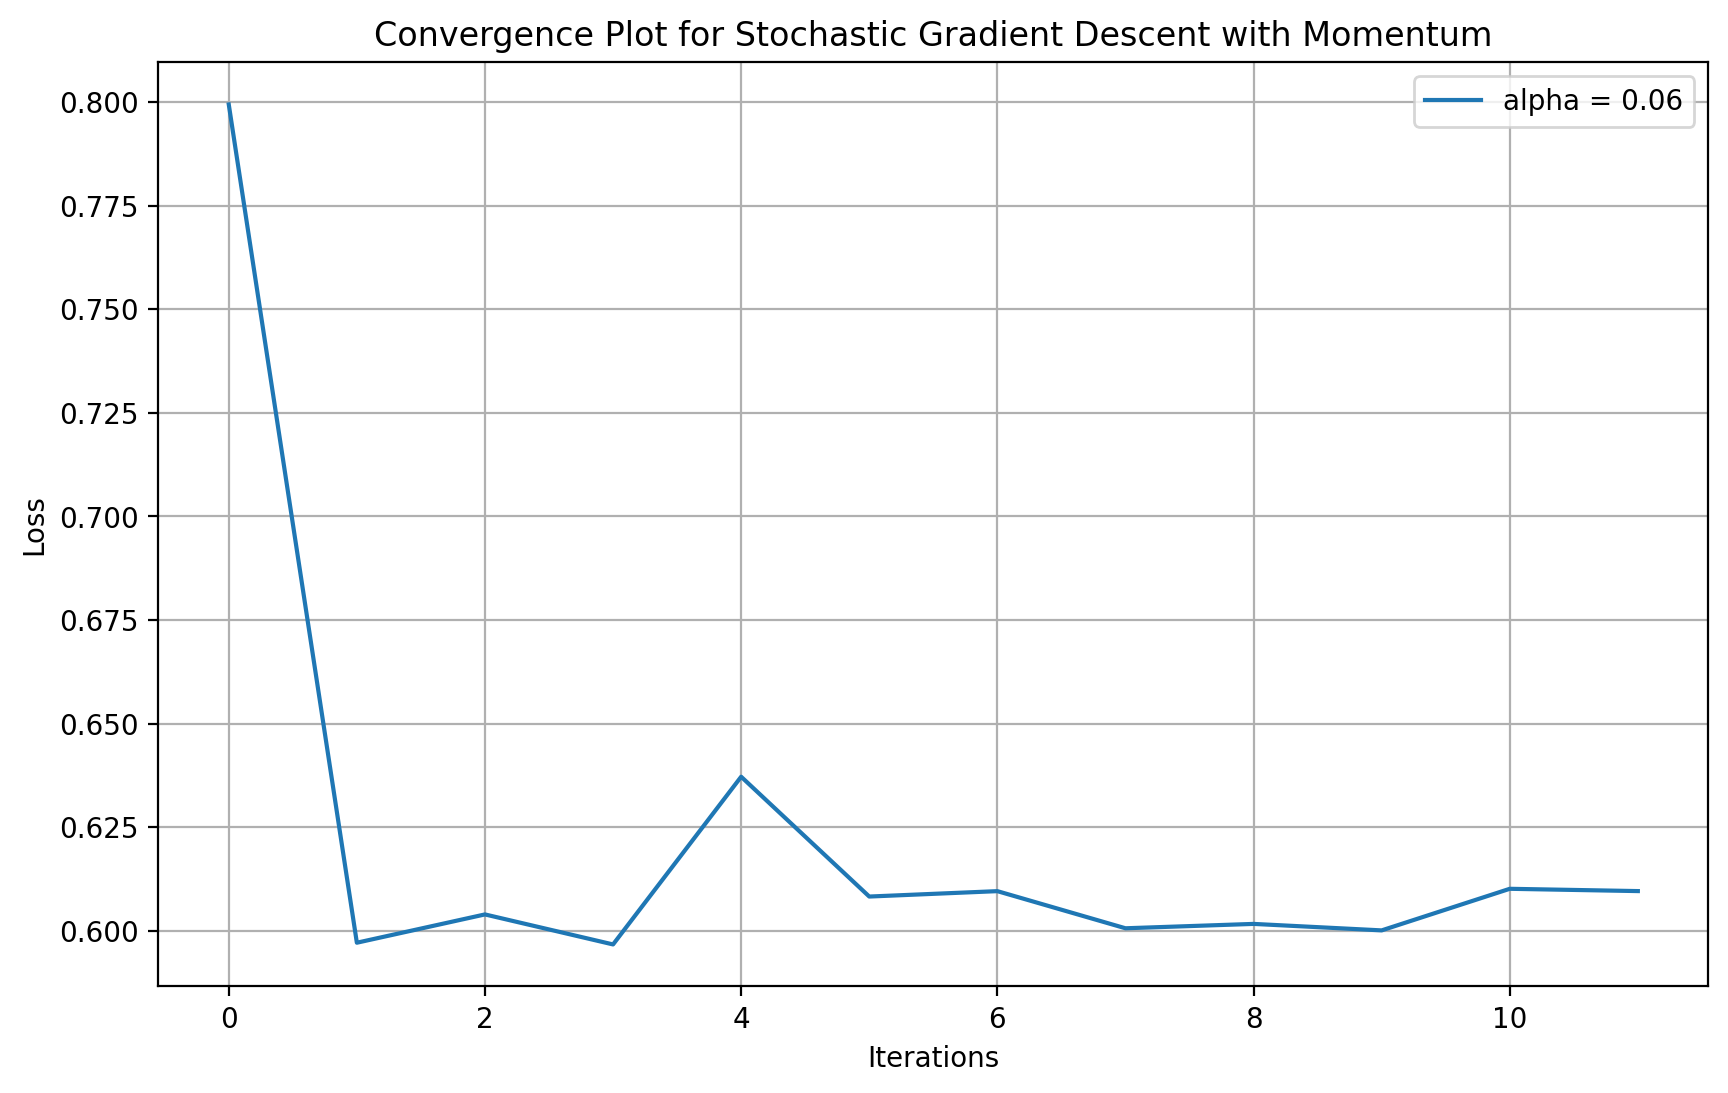

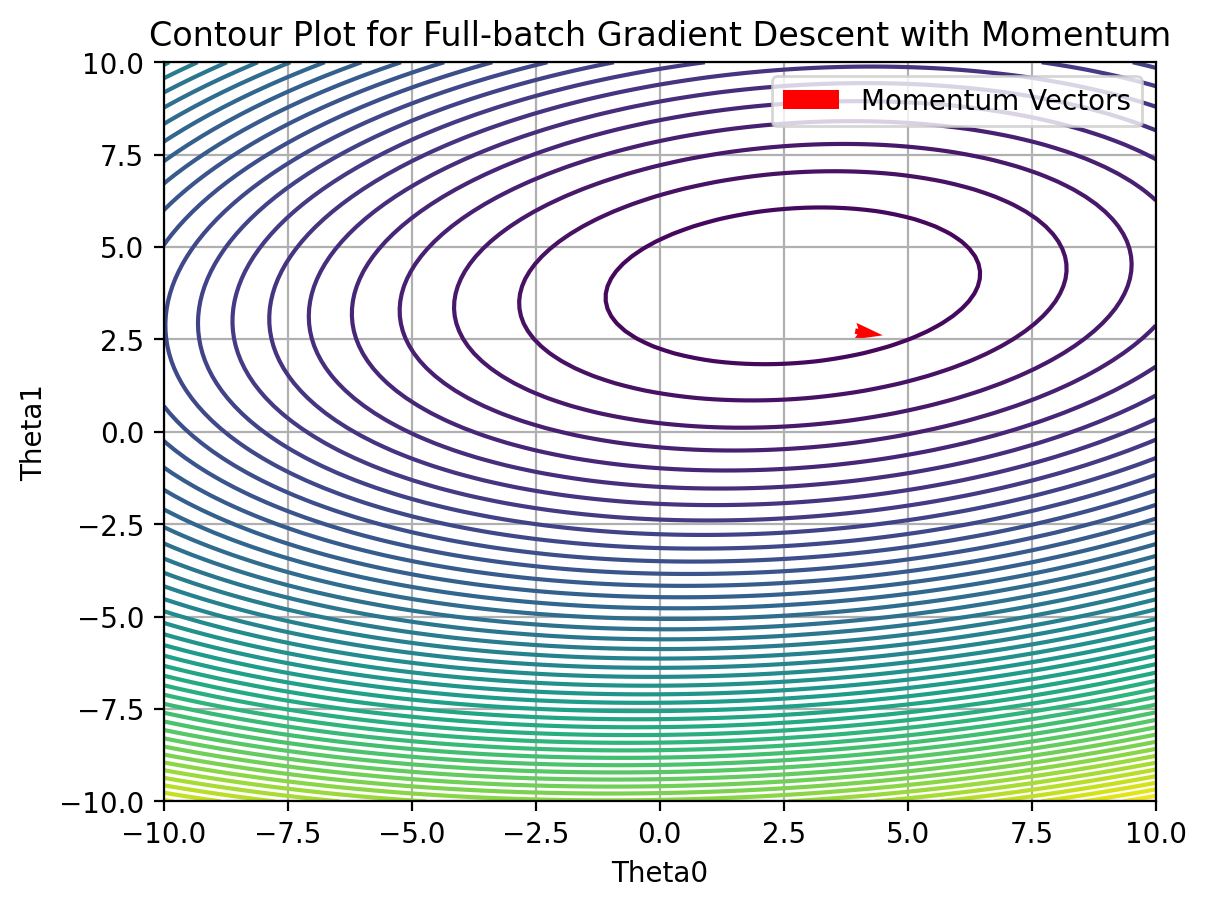

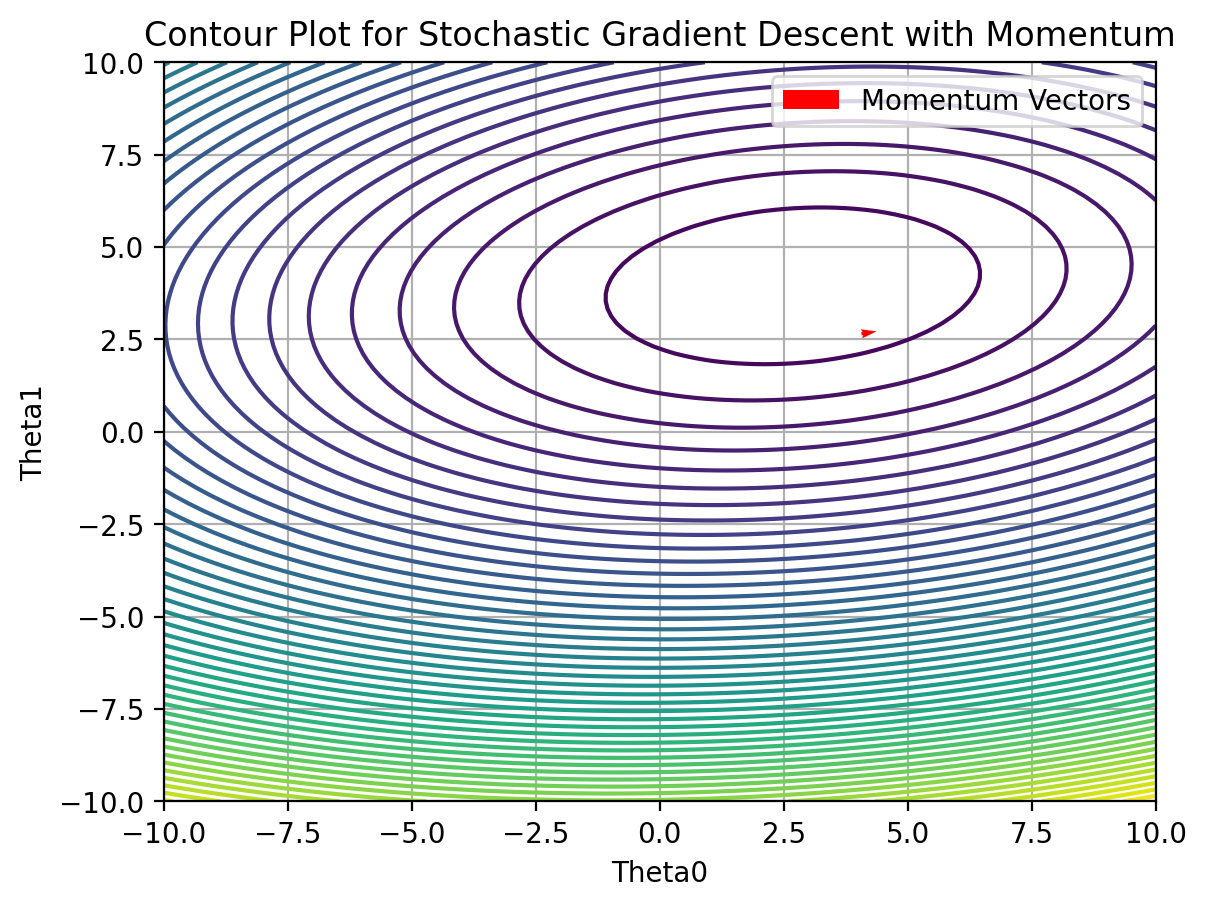

In [122]:
beta = 0.9

def gd_momentum_step(theta0, theta1, v0, v1, grad_theta0, grad_theta1, alpha, beta):
    # Momentum update rule
    v0 = beta * v0 + (1 - beta) * grad_theta0
    v1 = beta * v1 + (1 - beta) * grad_theta1
    theta0.data -= alpha * v0
    theta1.data -= alpha * v1
    return theta0, theta1, v0, v1

def loss(theta0, theta1, x, y):
    pred = theta0 + theta1 * x
    return torch.mean((pred - y) ** 2)

def descent_algorithm_momentum(x1_torch, y_torch, method, alpha, beta, epsilon, epochs, batch_size=None):
    theta0 = torch.tensor(0.0, requires_grad=True)
    theta1 = torch.tensor(0.0, requires_grad=True)
    v0, v1 = 0.0, 0.0  # Initialize momentum terms
    iter = 0
    prev_loss = float('inf')  # Initialize with a large value
    loss_history = []  # Track loss for plotting

    for epoch in range(epochs):
        if method == 'full-batch':
            for i in range(len(x1_torch)):
                loss_gd = loss(theta0, theta1, x1_torch[i], y_torch[i])
                loss_gd.backward()
                theta0, theta1, v0, v1 = gd_momentum_step(theta0, theta1, v0, v1, theta0.grad, theta1.grad, alpha, beta)
                theta0.grad.zero_()
                theta1.grad.zero_()
                iter += 1

        elif method == 'mini-batch':
            shuffle = torch.randperm(len(x1_torch))
            for i in range(0, len(x1_torch), batch_size):
                batch = shuffle[i:i+batch_size]
                x_batch = x1_torch[batch]
                y_batch = y_torch[batch]
                loss_mbgd = loss(theta0, theta1, x_batch, y_batch)
                loss_mbgd.backward()
                theta0, theta1, v0, v1 = gd_momentum_step(theta0, theta1, v0, v1, theta0.grad, theta1.grad, alpha, beta)
                theta0.grad.zero_()
                theta1.grad.zero_()
                iter += 1

        elif method == 'stochastic':
            shuffle = torch.randperm(len(x1_torch))
            for i in shuffle:
                loss_sgd = loss(theta0, theta1, x1_torch[i], y_torch[i])
                loss_sgd.backward()
                theta0, theta1, v0, v1 = gd_momentum_step(theta0, theta1, v0, v1, theta0.grad, theta1.grad, alpha, beta)
                theta0.grad.zero_()
                theta1.grad.zero_()
                iter += 1

        loss_final = loss(theta0, theta1, x1_torch, y_torch).item()
        loss_history.append(loss_final)  # Store loss in history

        # Check the stopping criterion based on consecutive losses
        if abs(prev_loss - loss_final) < epsilon:
            break
        prev_loss = loss_final

    return loss_history, theta0, theta1, iter, epoch + 1, v0, v1

# Function to plot the loss curves
def plot_convergence_momentum(loss_history, method):
    plt.figure(figsize=(10, 6))
    plt.plot(loss_history, label=f'alpha = {alpha}')
    plt.title(f'Convergence Plot for {method} Gradient Descent with Momentum')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run gradient descent with momentum using 'full-batch' method and plot
losses_momentum_full, theta0_full, theta1_full, iter_full, epoch_full, v0_full, v1_full = descent_algorithm_momentum(
    x1_torch, y_torch, 'full-batch', alpha, beta, epsilon, epochs, batch_size)
plot_convergence_momentum(losses_momentum_full, 'Full-batch')

# Run gradient descent with momentum using 'stochastic' method and plot
losses_momentum_sgd, theta0_sgd, theta1_sgd, iter_sgd, epoch_sgd, v0_sgd, v1_sgd = descent_algorithm_momentum(
    x1_torch, y_torch, 'stochastic', alpha, beta, epsilon, epochs, batch_size)
plot_convergence_momentum(losses_momentum_sgd, 'Stochastic')

# Contour Plot with Vector Fields
def plot_contours_with_vectors(x1_torch, y_torch, results, method):
    theta0_vals = np.linspace(-10, 10, 100)
    theta1_vals = np.linspace(-10, 10, 100)
    loss_grid = np.zeros((len(theta0_vals), len(theta1_vals)))

    for i, theta0 in enumerate(theta0_vals):
        for j, theta1 in enumerate(theta1_vals):
            theta0_t = torch.tensor(theta0)
            theta1_t = torch.tensor(theta1)
            loss_grid[i, j] = loss(theta0_t, theta1_t, x1_torch, y_torch).item()

    theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

    plt.contour(theta0_vals, theta1_vals, loss_grid, levels=50)
    plt.xlabel('Theta0')
    plt.ylabel('Theta1')

    # Add vectors for momentum and gradient steps
    for result in [results]:
        theta0 = result['theta0']
        theta1 = result['theta1']
        v0 = result['v0']
        v1 = result['v1']

        plt.quiver(theta0, theta1, -v0, -v1, color='red', angles='xy', scale_units='xy', scale=1, label="Momentum Vectors")

    plt.title(f'Contour Plot for {method} Gradient Descent with Momentum')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot contours for the 'full-batch' gradient descent with momentum
plot_contours_with_vectors(x1_torch, y_torch, {
    'theta0': theta0_full.item(), 'theta1': theta1_full.item(),
    'v0': v0_full, 'v1': v1_full
}, 'Full-batch')

# Plot contours for the 'stochastic' gradient descent with momentum
plot_contours_with_vectors(x1_torch, y_torch, {
    'theta0': theta0_sgd.item(), 'theta1': theta1_sgd.item(),
    'v0': v0_sgd, 'v1': v1_sgd
}, 'Stochastic')
